# Inflation Forecasting
> **Description:** Islamic Republic of Iran inflation forecasting with time series analysis
>
> **Authors:** Fatemeh Sadat Mousavi, Mahta Fetrat
>
> **Affiliation:** Students of Sharif University of Technology
>
> **Date:** Summer 1401

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# Load Data
The datasets are publicly available in [this](https://drive.google.com/drive/folders/1u6FyVqBlF7_meVR33mXUhpzp2SNPR5Xg?usp=sharing) folder with the id used below.

In [ ]:
!gdown --folder 1u6FyVqBlF7_meVR33mXUhpzp2SNPR5Xg &> /dev/null

In [ ]:
!ls ./datasets

annual_cpi   cpi_factors    gdp        monthly_cpi
cpi_changes  exchange_rate  liquidity  seasonal_mxp


In [ ]:
seasonal_mxp_df = pd.read_csv("datasets/seasonal_mxp/seasonal_mxp.csv")
liquidity_df = pd.read_csv("datasets/liquidity/liquidity.csv")
gdp_df = pd.read_csv("datasets/gdp/gdp.csv")
exchange_rate_df = pd.read_csv("datasets/exchange_rate/exchange_rate.csv")
monthly_cpi_df = pd.read_csv("datasets/monthly_cpi/monthly_cpi.csv")
annual_cpi_df = pd.read_csv("datasets/annual_cpi/annual_cpi.csv")

# Create Datasets
Here is a description of the datasets loaded above.
*   **Seasonal MXP** Seasonal, 1391-1400
*   **Liquidity** Annual, 1344-1400
*   **GDP** Annual, 1341-1400
*   **Exchange Rate** Monthly, 01/1371-05/1401
*   **Monthly CPI** Monthly, 01/1361-04/1401
*   **Annual CPI** Annual, 1315-1400 

Datasets have different time range and time steps so we are going to create three new datasets with unified time range and time steps as follows. Then we can do some feature selection and make use of these datasets.

*   **Exchange Rate-CPI** (monthly from 01/1371-04/1401)
*   **MXP-Echange Rate-CPI** (seasonal from 1/1/1391 to 10/1/1400)
*   **Liquidity-GDP-CPI** (annual from 1344 to 1400)
*   **MXP-Liquidity-GDP-Exchange Rate-CPI** (annual from 1391 to 1400)

In [ ]:
# concatenating exchange rate and monthly CPI

exch_rate_cpi_df = pd.concat(
    [
        exchange_rate_df[:-1],
        monthly_cpi_df["monthly CPI"].iloc[120:484].reset_index(drop=True),
    ],
    axis=1,
)

exch_rate_cpi_df.head()

,date,USD,monthly CPI
0,01/01/1371,1439.000000,1.5
1,02/01/1371,1447.880000,1.5
2,03/01/1371,1440.043478,1.5
3,04/01/1371,1439.000000,1.5
4,05/01/1371,1439.000000,1.6


In [ ]:
# concatenating MXP, exchange rate, and monthly CPI
exch_rate_in_range = exchange_rate_df["USD"][-125:-5].reset_index(drop=True)
exch_rate_seasonal_avg = pd.Series(
    [np.mean(exch_rate_in_range[3*i:3*(i+1)]) for i in range(40)],
    name="USD",
)

cpi_in_range = monthly_cpi_df["monthly CPI"][360:480].reset_index(drop=True)
cpi_seasonal_avg = pd.Series(
    [np.mean(cpi_in_range[3*i:3*(i+1)]) for i in range(40)],
    name="monthly CPI",
)

mxp_exch_cpi_df = pd.concat(
    [
        seasonal_mxp_df,
        exch_rate_seasonal_avg,
        cpi_seasonal_avg,
    ],
    axis=1,
)

mxp_exch_cpi_df.head()

,season,MXP,USD,monthly CPI
0,1/1/1391,25.7,12260.0,48.866667
1,4/1/1391,28.1,12260.0,52.433333
2,7/1/1391,32.5,12260.0,57.900000
3,10/1/1391,46.4,12260.0,62.833333
4,1/1/1392,51.2,12260.0,68.100000


In [ ]:
# concatenating liquidity, GDP, and annual CPI
liq_gdp_cpi_df = pd.concat(
    [
        liquidity_df,
        gdp_df["GDP"][-57:].reset_index(drop=True),
        annual_cpi_df["annual CPI"][-57:].reset_index(drop=True),
    ],
    axis=1,
)

liq_gdp_cpi_df.head()

,year,liquidity,GDP,annual CPI
0,1344,105.6,1590779,0.0533
1,1345,120.8,1782032,0.0533
2,1346,144.3,2010389,0.0533
3,1347,175.3,2296959,0.0533
4,1348,205.7,2683584,0.0533


In [ ]:
# all in one using annual CPI for the last 10 years
exch_rate_in_range = exchange_rate_df["USD"][-125:-5].reset_index(drop=True)
exch_rate_annual_avg = pd.Series(
    [np.mean(exch_rate_in_range[12*i:12*(i+1)]) for i in range(10)],
    name="USD",
)

mxp_in_range = seasonal_mxp_df["MXP"][-40:].reset_index(drop=True)
mxp_annual_avg = pd.Series(
    [np.mean(mxp_in_range[4*i:4*(i+1)]) for i in range(10)],
    name="MXP",
)

general_cpi_df = pd.concat(
    [
        liquidity_df[-10:].reset_index(drop=True),
        gdp_df["GDP"][-10:].reset_index(drop=True),
        mxp_annual_avg,
        exch_rate_annual_avg,
        annual_cpi_df["annual CPI"][-10:].reset_index(drop=True),
    ],
    axis=1,
)

general_cpi_df.head()

,year,liquidity,GDP,MXP,USD,annual CPI
0,1391,4606935.9,6279352,33.175,12260.000000,55.5046
1,1392,6395504.8,6434376,60.575,21320.991494,73.3066
2,1393,7823847.9,6580553,91.450,26522.743894,84.1748
3,1394,10172800.0,6577287,102.925,29589.629795,93.6757
4,1395,12533900.0,7508814,100.000,31400.884677,100.0000


# Datesets Plot

In [ ]:
import seaborn as sns

## Exchange Rate-CPI

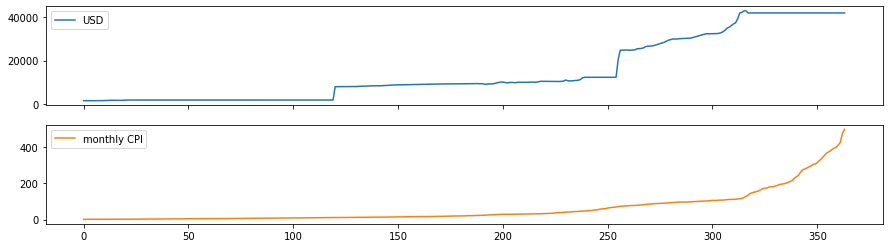

In [ ]:
exch_rate_cpi_df.plot(subplots=True, figsize=(15, 4))
plt.show()

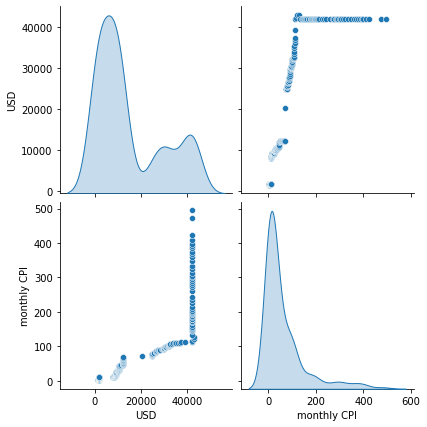

In [ ]:
sns.pairplot(exch_rate_cpi_df,  height=3, diag_kind='kde')
plt.show()

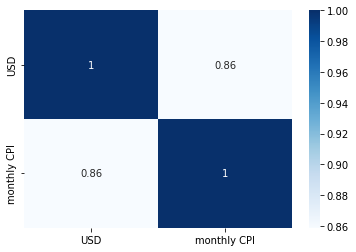

In [ ]:
sns.heatmap(exch_rate_cpi_df.corr(), cmap='Blues', annot=True)
plt.show()

## MXP-Exchange Rate-CPI

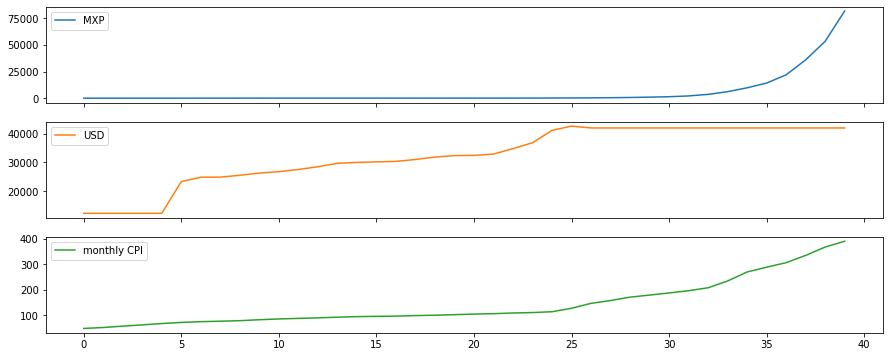

In [ ]:
mxp_exch_cpi_df.plot(subplots=True, figsize=(15, 6))
plt.show()

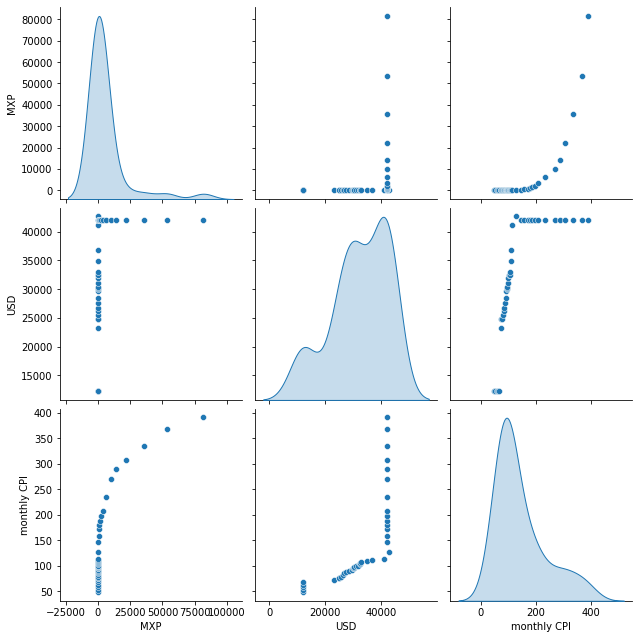

In [ ]:
sns.pairplot(mxp_exch_cpi_df,  height=3, diag_kind='kde')
plt.show()

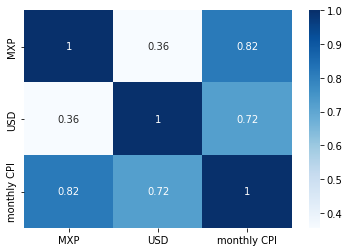

In [ ]:
sns.heatmap(mxp_exch_cpi_df.corr(), cmap='Blues', annot=True)
plt.show()

## Liquidity-GDP-CPI

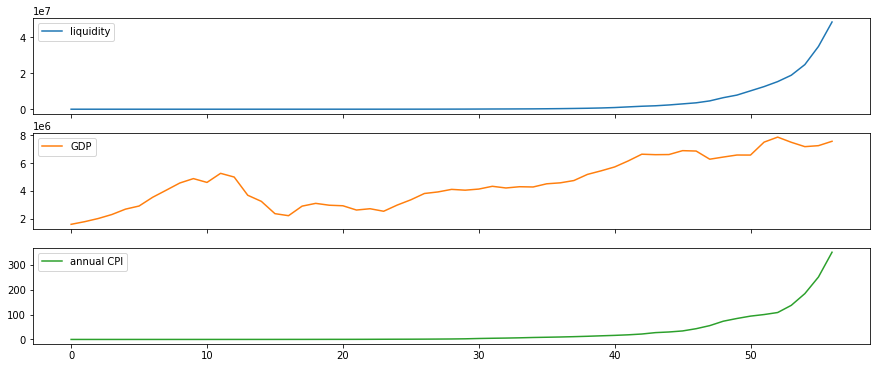

In [ ]:
liq_gdp_cpi_df.drop(columns=["year"]).plot(subplots=True, figsize=(15, 6))
plt.show()

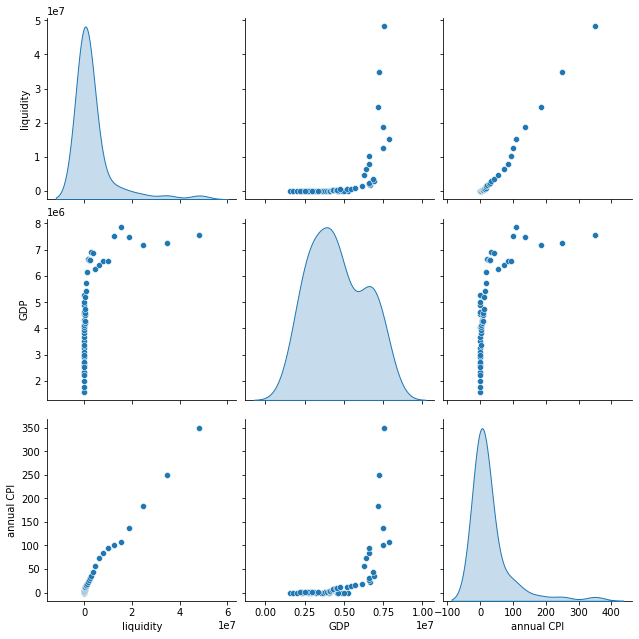

In [ ]:
sns.pairplot(liq_gdp_cpi_df.drop(columns=["year"]),  height=3, diag_kind='kde')
plt.show()

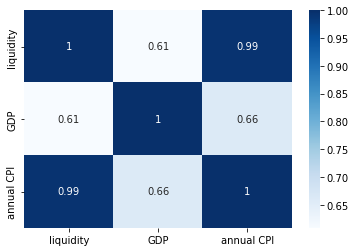

In [ ]:
sns.heatmap(liq_gdp_cpi_df.drop(columns=["year"]).corr(), cmap='Blues', annot=True)
plt.show()

## All Features

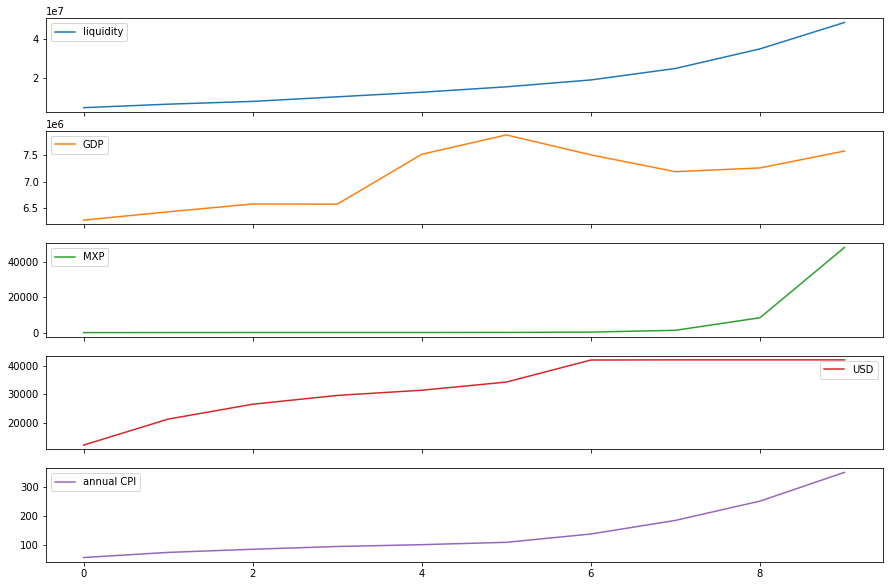

In [ ]:
general_cpi_df.drop(columns=["year"]).plot(subplots=True, figsize=(15, 10))
plt.show()

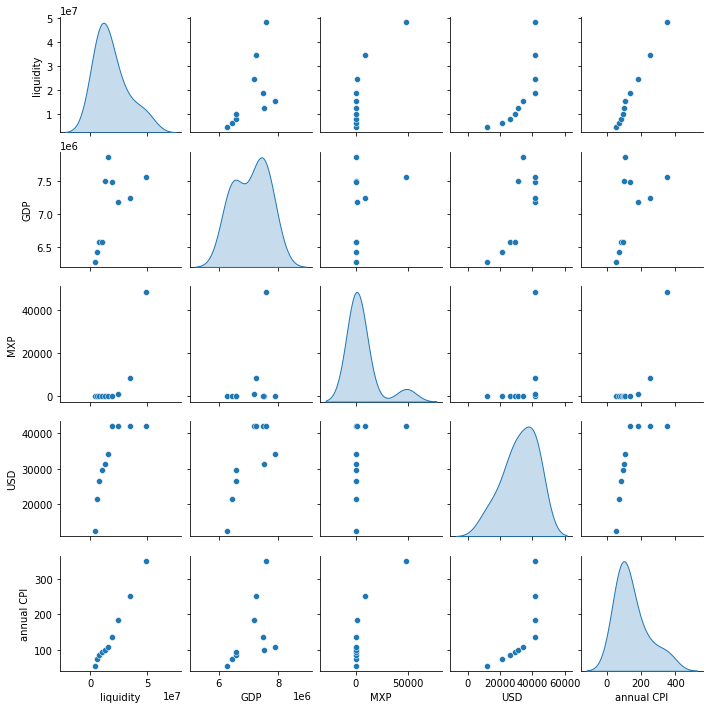

In [ ]:
sns.pairplot(general_cpi_df.drop(columns=["year"]),  height=2, diag_kind='kde')
plt.show()

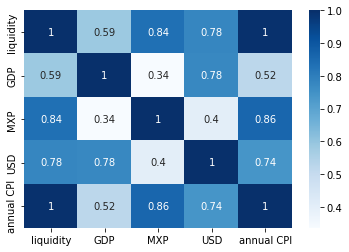

In [ ]:
sns.heatmap(general_cpi_df.drop(columns=["year"]).corr(), cmap='Blues', annot=True)
plt.show()

# Box-Jenkins method 
In time series analysis, the Box–Jenkins method, named after the statisticians George Box and Gwilym Jenkins, applies autoregressive moving average (ARMA) or autoregressive integrated moving average (ARIMA) models to find the best fit of a time-series model to past values of a time series.

The method comprises three steps. Below contains an explanation of how each step is performed in our implementation.

* **Model identification and model selection:** making sure that the variables are stationary, identifying seasonality in the dependent series, and using plots of the autocorrelation (ACF) and partial autocorrelation (PACF) functions of the dependent time series to decide which (if any) autoregressive or moving average component should be used in the model.
* **Parameter estimation:** using computation algorithms to arrive at coefficients that best fit the selected ARIMA model. This step is done behind the scenes at a call to the `fit` function of the models.
* **Statistical model checking:** by testing whether the estimated model conforms to the specifications of a stationary univariate process. In particular, the residuals should be independent of each other and constant in mean and variance over time. (Plotting the mean and variance of residuals over time and performing a Ljung–Box test or plotting autocorrelation and partial autocorrelation of the residuals are helpful to identify misspecification.) If the estimation is inadequate, we have to return to step one and attempt to build a better model.

Passing all these three steps, the model can be used to make forecasts on the future, unseen time steps.

Source: [Wikipedia](https://en.wikipedia.org/wiki/Box%E2%80%93Jenkins_method#Box%E2%80%93Jenkins_model_diagnostics)

# ARIMAX Model
In this section we will provide some utility functions to build a proper ARIMA model based on the Box-Jenkins method steps. These functions will be used on each dataset separately in the next section.

In [ ]:
# Stationarity test
from statsmodels.tsa.stattools import adfuller

# Autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

import warnings
from statsmodels.tools.sm_exceptions import *
warnings.simplefilter('ignore', UserWarning)

In [ ]:
!pip3 install pmdarima &> /dev/null

In [ ]:
import pmdarima as pm

## Stationarity
The statistical models used for time series analysis is this study, assume the dataset to be stationary. We will use the ADF test to check the stationarity of the datasets and the difference transform to make dataset stationary if needed.

### Augmented Dickey-Fuller Test (ADF)
> The null hypothesis of the ADF test assumes the presence of a unit root, the p-value obtained by the test should be less than the significance level (say 0.05) to reject the null hypothesis. Thereby, inferring that the series is stationary. - [analyticsindiamag](https://analyticsindiamag.com/)

The adfuller test provides the test statistics, the p-value, and the critical values as output. So in order to state that the dataset is stationary (rejecting the null hypothesis), we can either check if p-value < 0.05 or if the test statistics < critical value of the interested confidence level (5% in our case).

In [ ]:
def adf_stationarity_test(series):
  result = adfuller(series.values)

  print(f'ADF Statistic: {result[0]}')
  print(f'p-value: {result[1]}')
  print(f'Critical Values:')
  for key, value in result[4].items():
      print(f'\t{key}: {value:.3f}')

  stationary = (result[1] <= 0.05) & (result[4]['5%'] > result[0])
  color_format = "\033[92m{}\033[0m\n\n" if stationary else "\033[91m{}\033[0m\n\n"
  print(color_format.format("Stationary" if stationary else "Non-stationary"))

  return stationary

### Difference Transform
An important thing to note while applying the difference transform is over-differencing and under-differencing. In case of over-differencing, the time-series would yield limited useful information. Forecasting would be simplified to the naive forecast.

**How to identify over/under-differencing?**
> Rule 1: If the series has positive autocorrelations out to a high number of lags, then it probably needs a higher order of differencing.
>
> Rule 2: If the lag-1 autocorrelation is zero or negative, or the autocorrelations are all small and patternless, then the series does not need a higher order of  differencing. If the lag-1 autocorrelation is -0.5 or more negative, the series may be overdifferenced.  BEWARE OF OVERDIFFERENCING!!
>
> Rule 3: The optimal order of differencing is often the order of differencing at which the standard deviation is lowest. - [Source](https://people.duke.edu/~rnau/411arim2.htm)


**What to do in case over/under-differencing unavoidable?**
> If your series is slightly under differenced, adding one or more additional AR terms usually makes it up. Likewise, if it is slightly over-differenced, try adding an additional MA term. - [machinelearningplus](https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/)


In [ ]:
def apply_diff(y, d=1):
  for i in range(d):
    y = y.diff().fillna(0)
  return y

In [ ]:
def show_differencing_results(y, x, title, ylabel, xlabel, order):
  fig, axs = plt.subplots(1, 2, figsize=(20, 2.5))

  ax=axs[0]
  length = len(y)
  ax.plot(np.arange(length), y)
  ax.set_xticks(np.arange(length, step=-1))
  ax.set_xticklabels(map(str, x.take(np.arange(length, step=-1))), rotation=60)
  ax.set_xlabel(xlabel)
  ax.set_ylabel("Differenced {ylabel}")
  ax.set_title(f"Order {order} Differenced {title}")

  plot_acf(y, lags=9, ax=axs[1])
  plt.show()

  print(f"Std of the differenced series: {np.std(y)}")

In [ ]:
def check_stationarity(y, x, title, ylabel, xlabel):
  for i in range(11):
    show_differencing_results(y, x, title, ylabel, xlabel, i)
    if adf_stationarity_test(y):
      print(f"The dataset is staionary with differencing order {i}.")
      return
  
    y = apply_diff(y)

  print(f"The dataset is not staionary even with tenth order differencing.")

## Parameter Selection (p, q)
Having ensured the data stationarity, we should then choose some proper values for the p and q parameters of the ARIMA model.

### Auto Arima
A common utility that can help selecting the parameter set is the pmdarima library which lookes throug possible combination of parameters with regrad to its configurations and returns the one with the least AIC score.

In [ ]:
def apply_auto_arima_model_selection(dataset, target_col, exog_cols, stepwise=True):
    model = pm.auto_arima(
        dataset[target_col],
        exogenous=dataset[exog_cols],
        start_p=0, start_q=0,
        max_p=10, max_q=10, max_d=10,
        seasonal=False,
        trace=True,
        test='adf',
        error_action='ignore',  # don't want to know if an order does not work
        suppress_warnings=True,  # don't want convergence warnings
        stepwise=stepwise,
    )
    
    return model

## Model Checking
Here we will provide both visual and statistical test results to show that the model passes the Box-Jenkins requirements and hence is able to produce reliable results in the forecasing pahse. 

### Plot Predictions
One of the simplest yer most important checks to be done is to see if the model fits the training data well by plotting in-sample predictions. Taking a look at the future forecasts of the model can help as well.

In [ ]:
def plot_predictions(fitted_model, actual_series, num_of_forecasts=5, alpha=0.05):
  forecasts, conf = fitted_model.predict(num_of_forecasts, return_conf_int=True, alpha=alpha)
  lenght = len(actual_series)
  predictions = fitted_model.predict_in_sample()
  predictions = predictions.append(forecasts)[1:]

  forecast_index = np.arange(lenght, lenght + num_of_forecasts)
  lower_series = pd.Series(conf[:, 0], index=forecast_index)
  upper_series = pd.Series(conf[:, 1], index=forecast_index)

  plt.figure(figsize=(18,5))
  plt.plot(actual_series, label='Actual')
  plt.plot(predictions, label='Predictions')
  plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
  plt.title('Predictions vs Actuals')
  plt.legend(loc="upper left")
  plt.show()

### Plot reiduals diagnostics
For the model to be accepted by the Box-Jenkins method, the residuals must be independent of each other and show no autocorrelation.
> The errors from an ideal model would resemble white noise, that is a Gaussian distribution with a mean of zero and a symmetrical variance.
> 
> Additionally, an ideal model would leave no temporal structure in the time series of forecast residuals. These can be checked by creating ACF and PACF plots of the residual error time series. - [machinelearningmastery](https://machinelearningmastery.com/gentle-introduction-box-jenkins-method-time-series-forecasting/)

So we will plot the AC and PAC functions as well as the KDE for the residuals.


In [ ]:
def plot_residuals_diagnostics(fitted_model):
  fig, axs = plt.subplots(1, 2, figsize=(18, 5))
  
  fitted_model.resid().plot(
      ax=axs[0],
      kind='kde',
      title='ARIMA Fit Residual Error Density Plot',
      xlabel='Residual Values',
      grid=True,
  )
  plot_acf(fitted_model.resid(), lags=9, ax=axs[1])
  plt.show()

  print(f"Mean: {np.mean(fitted_model.resid())}")
  print(f"STD: {np.std(fitted_model.resid())}\n")

### Apply normality test for residuals
Although the plotting methods above help visualize how well the residuals fit the desired distribution, statistical tests can provide more reliable results and hence are also used in this study. As it was suggested in the Box-Jenkins method section in this notebook, we are going to use the **Ljung-Box** test, the null hypothsis of which is as follows: 

*   H0: The data are independently distributed.

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [ ]:
def apply_normality_tests(fitted_model):
  pvalues = acorr_ljungbox(fitted_model.resid(), lags=9)['lb_pvalue'].to_numpy()

  print(f"Ljung-Box Test")
  print(f"p-values: {pvalues}")

  independent = np.all(pvalues >= 0.05)
  color_format = "\033[92m{}\033[0m\n\n" if independent else "\033[91m{}\033[0m\n\n"
  print(f"result: {color_format.format('Independent' if independent else 'Not Independent')}")

# Time Series Analysis
In this section we will use the utility functions from the previous section to buid proper ARIMA models for each of the datasets based on the Box_Jenkins method and use the results to forecast values in the time steps of interest in this study.

Just one more step before jumping to the datasets, let's implement a helper function to show the diagnostics of a selected model.  

In [ ]:
def show_model_diagnostics(series, fitted_model, forecasts=5):
  plot_predictions(fitted_model, series, num_of_forecasts=forecasts)
  print(f"\n{'='*50}Residuals{'='*100}\n")
  plot_residuals_diagnostics(fitted_model)
  apply_normality_tests(fitted_model)

## Exchange Rate-Montly CPI Analysis

Since we only got one independent variable, there is no need to apply differencing on the exogenous variables. Let's apply the auto arima model selection to get the arimax model we want.

In [ ]:
exch_rate_model = apply_auto_arima_model_selection(exch_rate_cpi_df, "monthly CPI", ["USD"], stepwise=False)

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1739.278, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=1650.492, Time=0.09 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=1651.975, Time=0.22 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=1642.015, Time=0.20 sec
 ARIMA(0,2,4)(0,0,0)[0] intercept   : AIC=1659.872, Time=0.29 sec
 ARIMA(0,2,5)(0,0,0)[0] intercept   : AIC=1630.160, Time=0.52 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=1649.150, Time=0.06 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=1650.981, Time=0.13 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=1651.869, Time=0.29 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=1643.836, Time=0.30 sec
 ARIMA(1,2,4)(0,0,0)[0] intercept   : AIC=1655.241, Time=0.70 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=1651.046, Time=0.10 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=1645.102, Time=0.59 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=1645.128, Time=0.40 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=1645.741, Time=0.78 sec
 ARIMA(3,2

The selected model has no AR term, used order two differencing for stationarity, and has an MA term of degree 5.

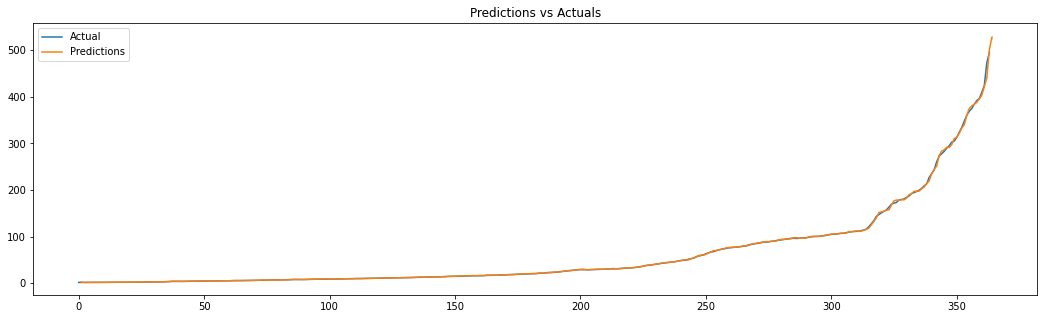


==================================================Residuals====================================================================================================



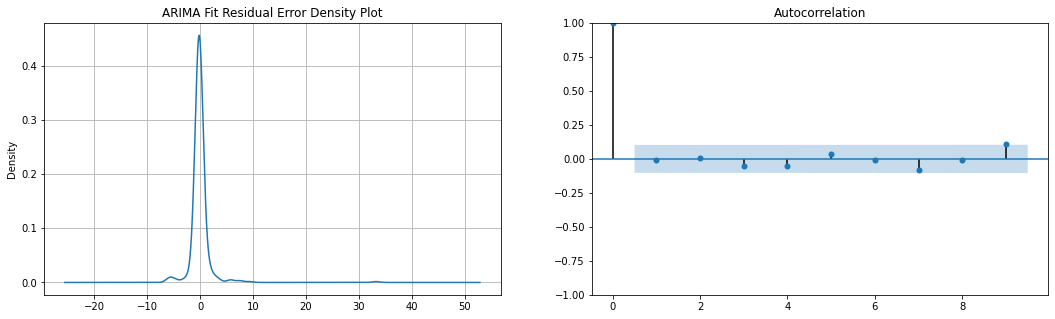

Mean: -0.0011102529580935589
STD: 2.2432024094093563

Ljung-Box Test
p-values: [0.90877177 0.97918941 0.77272624 0.72272419 0.75384679 0.84694791
 0.63340943 0.72998034 0.37749211]
result: Independent




In [ ]:
show_model_diagnostics(exch_rate_cpi_df["monthly CPI"], exch_rate_model, forecasts=1)

Now let's see the foracasts this model makes.

In [ ]:
exch_rate_cpi_df.tail()

,date,USD,monthly CPI
359,12/01/1400,42000.0,396.6
360,01/01/1401,42000.0,409.4
361,02/01/1401,42000.0,424.4
362,03/01/1401,42000.0,473.2
363,04/01/1401,42000.0,494.7


In [ ]:
print(f"The CPI forecast at 5/1/1401 based on the exchange rate model is: {exch_rate_model.predict(1).iloc[0]}")

The CPI forecast at 5/1/1401 based on the exchange rate model is: 527.621163322098


Now lets make predictions for the year 1401 and 1402.

In [ ]:
# Get average exchange rate for next 2 years (from both its forecast and actual values)
predicted_y = exch_rate_model.predict(20)
y_1401 = np.mean(np.append(monthly_cpi_df["monthly CPI"][-4:], predicted_y[-20:-12]))
y_1402 = np.mean(predicted_y[-12:])

In [ ]:
print(f"CPI forecast for the year 1401 is {y_1401}")
print(f"CPI forecast for the year 1402 is {y_1402}")

CPI forecast for the year 1401 is 560.0417677662529
CPI forecast for the year 1402 is 817.6891738108683


## Seasonal MXP-Montly CPI Analysis

Since we only got one independent variable, there is no need to apply differencing on the exogenous variables. Let's apply the auto arima model selection to get the arimax model we want.

In [ ]:
mxp_model = apply_auto_arima_model_selection(mxp_exch_cpi_df, "monthly CPI", ["MXP"], stepwise=False)

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=239.034, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=240.411, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=231.627, Time=0.09 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=232.942, Time=0.08 sec
 ARIMA(0,2,4)(0,0,0)[0] intercept   : AIC=231.808, Time=0.10 sec
 ARIMA(0,2,5)(0,0,0)[0] intercept   : AIC=233.773, Time=0.15 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=241.028, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=240.157, Time=0.08 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=233.416, Time=0.07 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=230.521, Time=0.12 sec
 ARIMA(1,2,4)(0,0,0)[0] intercept   : AIC=232.114, Time=0.17 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=229.547, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=231.486, Time=0.08 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=233.012, Time=0.08 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=234.766, Time=0.14 sec
 ARIMA(3,2,0)(0,0,0)[0] i

The selected model has no AR term, used order two differencing for stationarity, and has an MA term of degree 1.

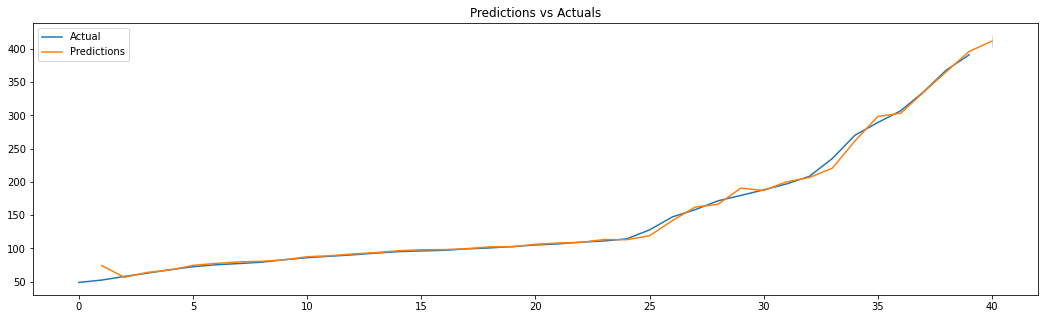


==================================================Residuals====================================================================================================



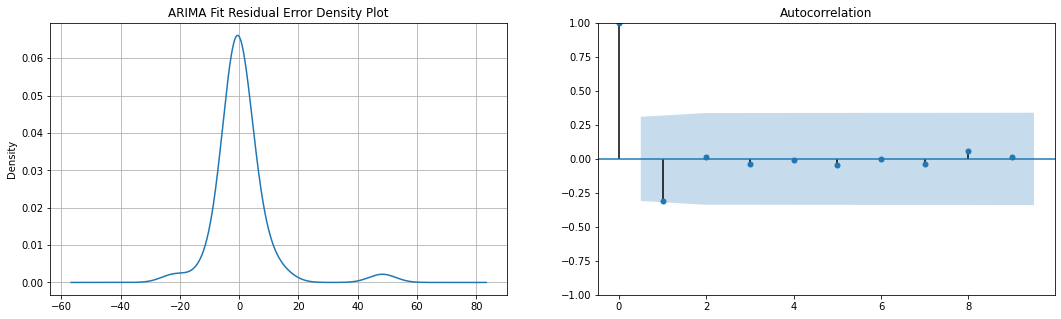

Mean: 0.6673083170843883
STD: 9.394245844159373

Ljung-Box Test
p-values: [0.04433512 0.1319554  0.24924386 0.39039697 0.52046587 0.64912044
 0.74725768 0.81537581 0.87917083]
result: Not Independent




In [ ]:
show_model_diagnostics(mxp_exch_cpi_df["monthly CPI"], mxp_model, forecasts=1)

Now let's see the foracasts this model makes.

In [ ]:
mxp_exch_cpi_df.drop('USD', axis=1).tail()

,season,MXP,monthly CPI
35,10/1/1399,14222.4,289.100000
36,1/1/1400,21952.9,306.733333
37,4/1/1400,35931.7,335.133333
38,7/1/1400,53381.0,368.000000
39,10/1/1400,81791.9,390.800000


In [ ]:
print(f"The CPI forecast at the first season of 1401 based on mxp model is: {mxp_model.predict(1).iloc[0]}")

The CPI forecast at the first season of 1401 based on mxp model is: 411.47957173764667


This value perfectly matches with the actual mean CPI of the first three months of 1401.

In [ ]:
print(f"The actual CPI value at 1/1/1401 is: {np.mean(monthly_cpi_df['monthly CPI'][-5:-2])}")

The actual CPI value at 1/1/1401 is: 410.1333333333334


Now lets make predictions for the year 1401 and 1402.

In [ ]:
predicted_y = mxp_model.predict(8)
y_1401 = np.mean(predicted_y[-8:-4])
y_1402 = np.mean(predicted_y[-4:])

In [ ]:
print(f"CPI forecast for the year 1401 is {y_1401}")
print(f"CPI forecast for the year 1402 is {y_1402}")

CPI forecast for the year 1401 is 453.24660421924534
CPI forecast for the year 1402 is 564.7154675490837


## Liquidity-GDP-Annual CPI Analysis

Before applying the auto arima model selector, we got to make sure the order of differencing for both the GDP and liquidity datasets is the same.

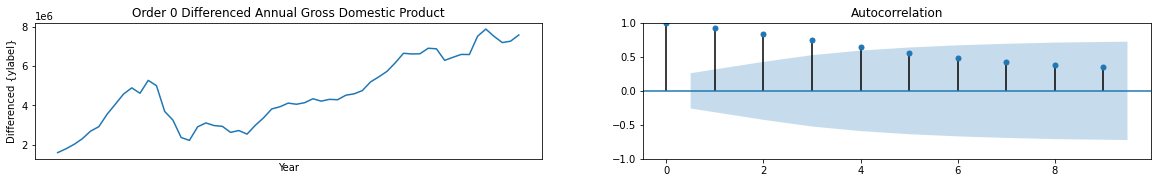

Std of the differenced series: 1733701.3269068517
ADF Statistic: -0.4074654638438019
p-value: 0.9088448303775564
Critical Values:
	1%: -3.563
	5%: -2.919
	10%: -2.597
Non-stationary




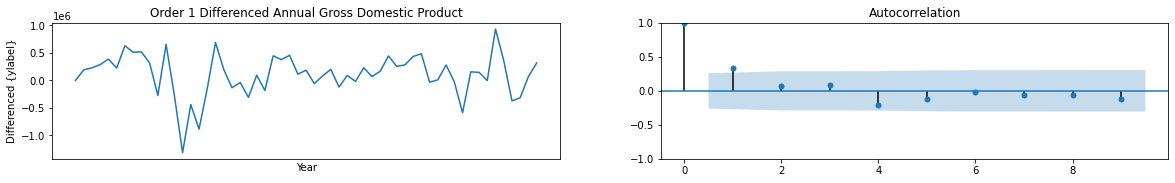

Std of the differenced series: 375906.2198881879
ADF Statistic: -4.119071818647371
p-value: 0.0009005610388870734
Critical Values:
	1%: -3.560
	5%: -2.918
	10%: -2.597
Stationary


The dataset is staionary with differencing order 1.


In [ ]:
check_stationarity(
    liq_gdp_cpi_df["GDP"],
    liq_gdp_cpi_df.index,
    "Annual Gross Domestic Product",
    "GDP",
    "Year",
)

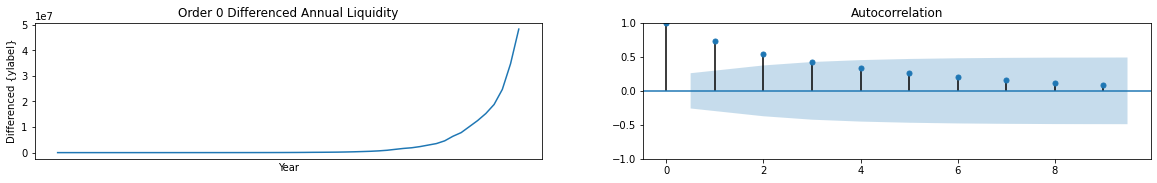

Std of the differenced series: 8839173.363828367
ADF Statistic: -2.561082368515287
p-value: 0.1013104333280076
Critical Values:
	1%: -3.571
	5%: -2.923
	10%: -2.599
Non-stationary




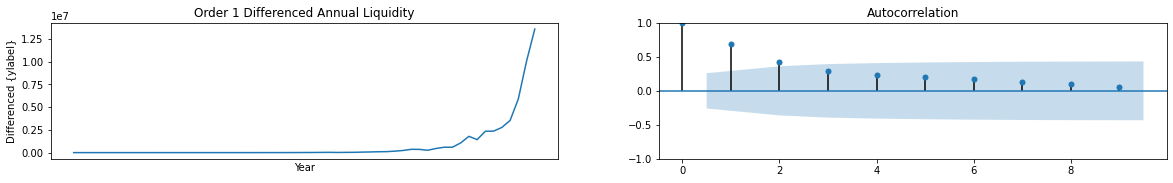

Std of the differenced series: 2359850.910036232
ADF Statistic: -3.631630014535533
p-value: 0.005184338611646054
Critical Values:
	1%: -3.585
	5%: -2.928
	10%: -2.602
Stationary


The dataset is staionary with differencing order 1.


In [ ]:
check_stationarity(
    liq_gdp_cpi_df["liquidity"],
    liq_gdp_cpi_df.index,
    "Annual Liquidity",
    "Liquidity",
    "Year",
)

As you can see, both of the exogenous variables are stationary with order one differencing. Now let's apply the auto arima model selection to get the arimax model we want.

In [ ]:
liq_gdp_model = apply_auto_arima_model_selection(liq_gdp_cpi_df, "annual CPI", ["GDP", "liquidity"], stepwise=False)

 ARIMA(0,3,0)(0,0,0)[0]             : AIC=302.645, Time=0.02 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=304.110, Time=0.03 sec
 ARIMA(0,3,2)(0,0,0)[0]             : AIC=304.446, Time=0.05 sec
 ARIMA(0,3,3)(0,0,0)[0]             : AIC=299.249, Time=0.06 sec
 ARIMA(0,3,4)(0,0,0)[0]             : AIC=294.890, Time=0.13 sec
 ARIMA(0,3,5)(0,0,0)[0]             : AIC=295.366, Time=0.14 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=304.056, Time=0.02 sec
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=306.056, Time=0.04 sec
 ARIMA(1,3,2)(0,0,0)[0]             : AIC=302.078, Time=0.17 sec
 ARIMA(1,3,3)(0,0,0)[0]             : AIC=298.983, Time=0.25 sec
 ARIMA(1,3,4)(0,0,0)[0]             : AIC=296.276, Time=0.35 sec
 ARIMA(2,3,0)(0,0,0)[0]             : AIC=306.055, Time=0.03 sec
 ARIMA(2,3,1)(0,0,0)[0]             : AIC=306.817, Time=0.09 sec
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(2,3,3)(0,0,0)[0]             : AIC=293.263, Time=0.15 sec
 ARIMA(3,3,0)(0,0,0)[0]      

The selected model is AR of degree 4, uses order 3 differencing, and has no MA term.

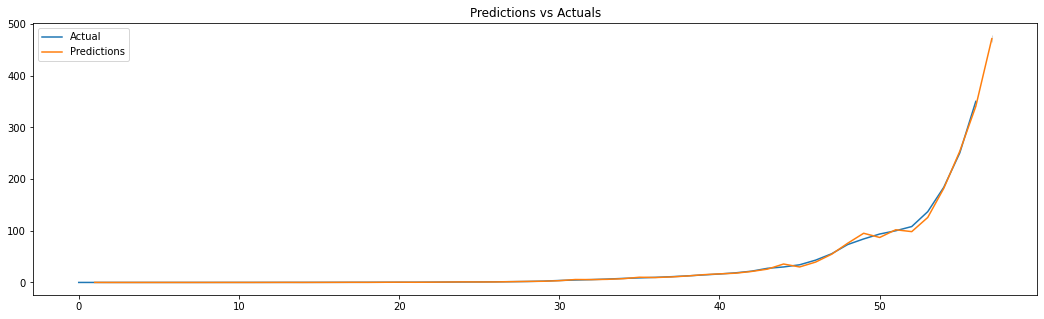


==================================================Residuals====================================================================================================



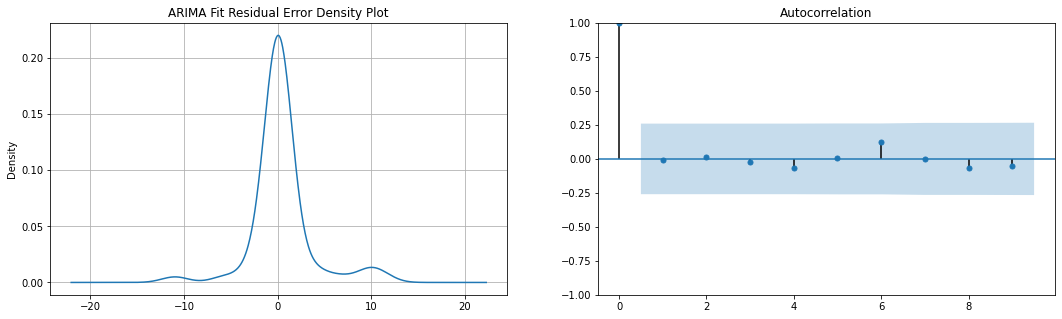

Mean: 0.4668403696662453
STD: 3.1391014128751054

Ljung-Box Test
p-values: [0.95912224 0.99262111 0.99779331 0.98938866 0.99745924 0.96899258
 0.98713411 0.98974446 0.99377115]
result: Independent




In [ ]:
show_model_diagnostics(liq_gdp_cpi_df["annual CPI"], liq_gdp_model, forecasts=1)

Now let's see the foracasts this model makes.

In [ ]:
liq_gdp_cpi_df.tail()

,year,liquidity,GDP,annual CPI
52,1396,15299800.0,7869763,108.1290
53,1397,18828900.0,7497744,136.9254
54,1398,24721500.0,7183703,183.9958
55,1399,34761700.0,7254000,250.6023
56,1400,48324400.0,7569000,350.1596


Now lets make predictions for the year 1401 and 1402.

In [ ]:
predicted_y = liq_gdp_model.predict(2)
y_1401 = predicted_y.values[0]
y_1402 = predicted_y.values[1]

In [ ]:
print(f"CPI forecast for the year 1401 is {y_1401}")
print(f"CPI forecast for the year 1402 is {y_1402}")

CPI forecast for the year 1401 is 471.47936043967735
CPI forecast for the year 1402 is 618.106390306825


## All Features

In [ ]:
general_model = apply_auto_arima_model_selection(
    general_cpi_df,
    "annual CPI",
    ["liquidity", "GDP", "MXP", "USD"],
     stepwise=False
)

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=68.337, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=nan, Time=0.15 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=65.112, Time=0.11 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=67.016, Time=0.17 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.83 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=69.015, Time=0.49 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(1,2,0)(0,0,0)[0] intercept
Total fit time: 4.934 seconds

The selected model has no AR term, used order two differencing for stationarity, and has an MA term of degree 5.

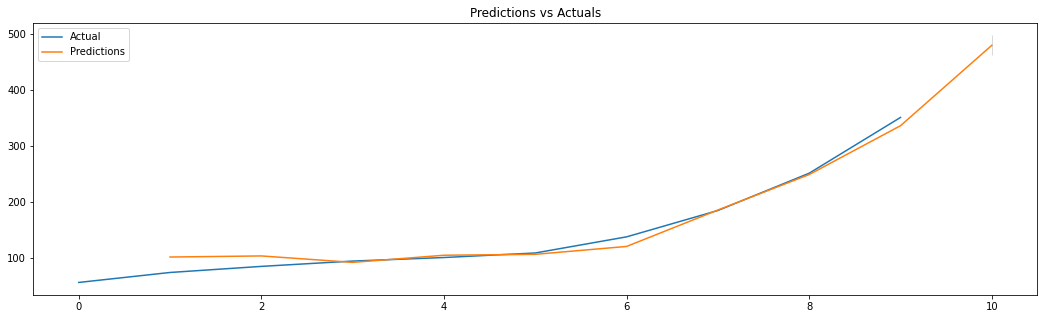


==================================================Residuals====================================================================================================



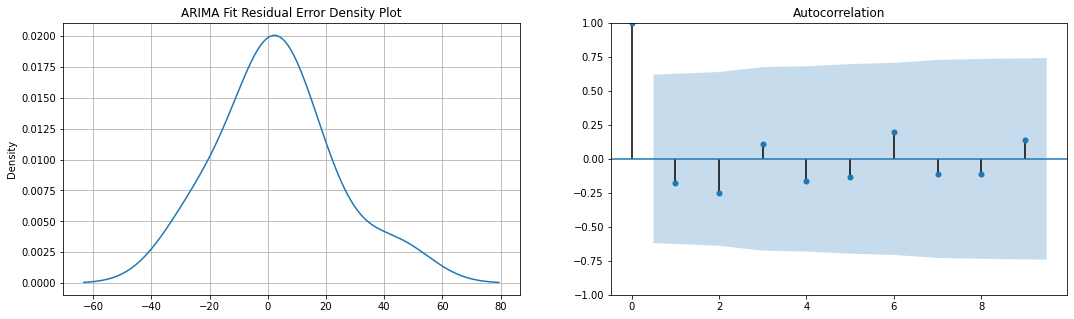

Mean: 3.161245112331361
STD: 18.628066851769432

Ljung-Box Test
p-values: [0.51406662 0.51098271 0.66963785 0.71638863 0.77344071 0.71236122
 0.75086903 0.75785465 0.61567507]
result: Independent




In [ ]:
show_model_diagnostics(general_cpi_df["annual CPI"], general_model, forecasts=1)

This model has made perfect in-sample predictions with a mean residual value of 3 were the order of actual values is about 100. Also this models passes the residual independence test and is reliable for the future forecasts. We can apply two additional tests on the residuals to further admit the predictive power of the model.

In [ ]:
from scipy.stats import shapiro, jarque_bera

In [ ]:
# Jarque-Bera Test. H0: Data has normal distribution
pvalue = jarque_bera(general_model.resid()).pvalue
print(f"Jarque-Bera Test\npvalue: {pvalue}")

color_format = "\033[92m{}\033[0m\n\n" if pvalue > 0.05 else "\033[91m{}\033[0m\n\n"
print(f"result: {color_format.format('' if pvalue > 0.05 else 'Not')} Normally distributed")

Jarque-Bera Test
pvalue: 0.8133740613982128
result: 

 Normally distributed


In [ ]:
# Shapiro-Wilks Test. H0: Data has normal distribution
pvalue = shapiro(general_model.resid()).pvalue
print(f"Shapiro-Wilks Test\npvalue: {pvalue}")

color_format = "\033[92m{}\033[0m\n\n" if pvalue > 0.05 else "\033[91m{}\033[0m\n\n"
print(f"result: {color_format.format('' if pvalue > 0.05 else 'Not')} Normally distributed")

Shapiro-Wilks Test
pvalue: 0.5663688778877258
result: 

 Normally distributed


Now let's see the forecast this model makes.

In [ ]:
general_cpi_df.tail()

,year,liquidity,GDP,MXP,USD,annual CPI
5,1396,15299800.0,7869763,128.350,34248.873403,108.1290
6,1397,18828900.0,7497744,336.575,41951.040323,136.9254
7,1398,24721500.0,7183703,1330.050,42000.000000,183.9958
8,1399,34761700.0,7254000,8440.775,42000.000000,250.6023
9,1400,48324400.0,7569000,48264.375,42000.000000,350.1596


Now lets make predictions for the year 1401 and 1402.

In [ ]:
predicted_y = general_model.predict(2)
y_1401 = predicted_y.values[0]
y_1402 = predicted_y.values[1]

In [ ]:
print(f"CPI forecast for the year 1401 is {y_1401}")
print(f"CPI forecast for the year 1402 is {y_1402}")

CPI forecast for the year 1401 is 479.0085656631995
CPI forecast for the year 1402 is 634.121610675615
